In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
class Agent:
    genotype = 0
    N = 0
    fitness = 0
    
    def eval(self):
        positive_diag = []
        negative_diag = []
        for i in range(self.N):
            positive_diag.append(self.genotype[i] + i)
            negative_diag.append(self.genotype[i] - i)
        positive_diag = set(positive_diag)
        negative_diag = set(negative_diag)
        self.fitness = 2 * self.N - len(positive_diag) - len(negative_diag)
            
           
    def __init__(self, N):
        if type(N) == int:
            self.genotype = np.random.permutation(N)
            self.N = N
            self.eval()
        else :
            self.genotype = N
            self.N = len(N)
            self.eval()
            
            
    def resetgeno(self):
        self.genotype = np.random.permutation(lenght)

        
    def swap(self):
        a = int(np.floor(np.random.rand() * len(self.genotype)))
        b = int(np.floor(np.random.rand() * len(self.genotype)))
        temp = self.genotype[a]
        self.genotype[a] = self.genotype[b]
        self.genotype[b] = temp
        
        
    def mutate(self, prob = 0.1,shuffle_times = 1):
        if np.random.random() > prob:
            for i in range(shuffle_times):
                self.swap()
        

In [290]:
class Population:
    members = []
    lenght = 0
    best = 0
    def __init__(self, pop_len, ag_len):
        self.lenght = pop_len
        self.members = np.empty(pop_len,dtype=object)
        for i in range(pop_len):
            self.members[i] = Agent(ag_len)
        # TODO: make members a priority queue
        
        self.best = min(self.members,key=lambda x: x.fitness)

    def one_child(self, agent1, agent2):
        start = np.random.randint(0,len(agent1.genotype)-1)
        end = np.random.randint(start+1,len(agent1.genotype))
        crossover = list(agent1.genotype[start:end])
        for i in agent2.genotype:
            if i not in crossover:
                crossover.append(i)
        
        return Agent(np.array(crossover))
    
    def crossover(self, agent1, agent2):
        child1 = self.one_child(agent1, agent2)
        child2 = self.one_child(agent2, agent1)
        child1.mutate(0.1)
        child2.mutate(0.1)
        return (child1,child2)
    
    def choose_parent(self):
        parents_prob = []
        helper = [] 
        total_fitness = 0
        N = self.members[0].N
        worst = max(self.members,key=lambda x: x.fitness).fitness 
        for i in self.members:
            total_fitness += abs(worst - i.fitness)
            helper.append(abs(worst - i.fitness))
        for i in helper:
            parents_prob.append(i/ total_fitness)
        return parents_prob
    
    def evolve(self):
        self.best = min(self.members,key=lambda x: x.fitness)
        parents_prob = self.choose_parent()
#         print(parents_prob)
        for i in range(0,self.lenght - 2 ,2):
#             print(self.lenght,i,parents[i], parents[i + 1])
            parent1,parent2 = np.random.choice(self.lenght,p=parents_prob),np.random.choice(self.lenght,p=parents_prob)
            child1,child2 = self.crossover(self.members[parent1],self.members[parent2]) 
            self.members[parent1] = child1
            self.members[parent2] = child2
        
        
            
            
        
        
        
            
            

In [327]:
pop = Population(100,15)
to_plot = []


In [328]:
while pop.best.fitness > 0:
    pop.evolve()
    to_plot.append(pop.best.fitness)

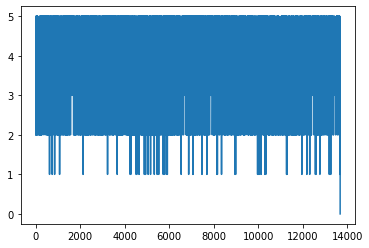

In [329]:
plt.plot(to_plot)

In [345]:
pop = Population(100,10)
to_plot = []


In [346]:
while pop.best.fitness > 0:
    pop.evolve()
    to_plot.append(pop.best.fitness)

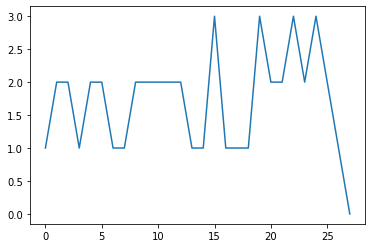

In [347]:
plt.plot(to_plot)